# **Exploring average gene expression**

Investigating cell atlases often involves exploring gene expression patterns across different cell types and organs. This tutorial guides you through using the [*atlasapprox* API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) to explore gene expression data effectively. You will gain a general idea of how to query average expression, discover patterns of similar genes, identify marker genes, and visualize the data.

### Contents
- Querying average expression data for a single organ
- Querying expression data for multiple organs
- Identifying expression patterns of similar genes
- Querying expression data for marker genes

## **Initialize the API**

To begin, import the *atlasapprox* Python package and create an API object:

In [11]:
import atlasapprox

api = atlasapprox.API()

For complete setup instructions, see the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb).

## **Querying average gene expression data**

A convenient way to query and fetch gene expression data is using the `average` method from the *atlasapprox* API. This method allows you to retrieve the average gene expression of selected genes within a specific organ of an organism.

The following example demonstrates how to retrieve the average expression of five genes (*TP53*, *KRAS*, *EGFR*, *BRAF* and *RB1*) in the human lung:

In [12]:
avg_gene_expr_lung = api.average(
    organism='h_sapiens', 
    organ='lung', 
    features=['TP53', 'KRAS', 'EGFR', 'BRAF', 'RB1'],
    measurement_type='gene_expression'
)

# Display the result
display(avg_gene_expr_lung)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
TP53,0.054815,0.119978,0.327787,0.132754,0.238697,0.178123,0.038301,0.202786,0.239634,0.074571,...,0.219169,0.126632,0.254856,0.175867,0.160920,0.110756,0.193365,0.252695,0.152536,0.227391
KRAS,1.529643,0.436303,0.977728,0.489622,0.443576,0.562167,0.243355,0.826480,0.767580,0.467747,...,1.357422,1.346849,0.794639,0.249971,0.388602,0.582125,0.251247,0.708356,0.319821,0.714599
EGFR,0.016721,0.024823,0.028325,0.011413,0.000949,0.138468,0.031597,0.064145,0.051909,0.000000,...,0.579046,0.736705,0.085129,0.666291,0.720418,0.670286,0.528496,0.980535,0.225700,2.810568
BRAF,0.319870,0.281498,0.332277,0.147644,0.218752,0.441736,0.164471,0.446945,0.708861,0.684334,...,0.497768,0.581323,0.442269,0.162484,0.301701,0.200566,0.223317,0.636350,0.242696,0.291017
RB1,0.383515,0.158201,1.057011,0.319462,0.567848,0.400670,0.142838,0.357886,0.482250,0.673035,...,0.990548,1.078372,0.372409,0.112924,0.190979,0.323514,0.301430,0.660065,0.178437,0.557652


#### Output
This method returns a *Pandas DataFrame* where:

* Each row represents a gene.
* Each column corresponds to a cell type.
* The values indicate the average gene expression, measured in counts per ten thousand (cptt).

## **Visualising the Data**

To visualize the average expression data of the queried genes, you can use the following code to generate a heatmap:

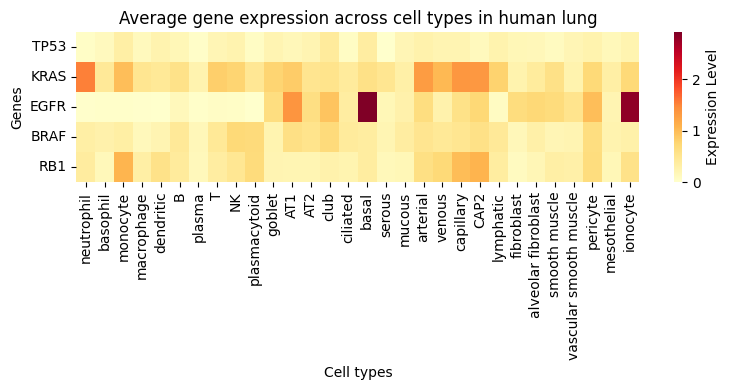

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(avg_gene_expr_lung, cmap='YlOrRd', cbar_kws={'label': 'Expression Level'})

# Labels and title
plt.title('Average gene expression across cell types in human lung')
plt.xlabel('Cell types')
plt.ylabel('Genes')

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## **Querying average gene expression for multiple organs**

You may explore gene expression across multiple organs within the same species for a comprehensive analysis.

The following example demonstrates the average gene expression of five specific genes (*TP53*, *KRAS*, *EGFR*, *BRAF* and *RB1*) across three human organs (*bladder*, *blood*, and *colon*).

In [14]:
# Define the target organs.
organ_list = ['bladder','blood','colon']

# Loop through organ_list and display the results
for organ in organ_list: 
    avg_gene_expr = api.average(
        organism='h_sapiens', 
        organ=organ, 
        features=['TP53', 'KRAS', 'EGFR', 'BRAF', 'RB1'],
    )

    print(f'Average gene expression in human {organ}:')
    display(avg_gene_expr)

Average gene expression in human bladder:


,mast,macrophage,B,plasma,T,NK,plasmacytoid,urothelial,venous,capillary,lymphatic,fibroblast,smooth muscle,pericyte
TP53,0.051055,0.188240,0.327816,0.053807,0.147462,0.314548,0.398251,0.162376,0.339704,0.217849,0.104213,0.111125,0.162751,0.112216
KRAS,0.564742,0.690973,1.319512,0.357356,1.065008,1.569626,0.354131,0.537687,0.719438,0.811878,0.722906,0.393044,0.612407,0.582806
EGFR,0.014139,0.020800,0.011188,0.006583,0.007657,0.006421,0.000000,0.290386,0.041818,0.076526,0.000000,0.897405,0.489930,0.349536
BRAF,0.722303,0.494707,0.703351,0.223818,0.697070,0.614423,0.899199,0.475452,0.451209,0.557312,0.324451,0.254430,0.305362,0.293012
RB1,0.216269,1.192079,0.701597,0.185632,0.249735,0.479438,0.296948,0.176039,0.525998,0.557835,0.145084,0.120365,0.188804,0.264880


Average gene expression in human blood:


,HSC,neutrophil,basophil,myeloid,monocyte,macrophage,dendritic,erythrocyte,B,plasma,T,NK,plasmacytoid,platelet
TP53,0.429484,0.019245,0.550442,0.757884,0.282390,0.409350,0.153117,0.004213,0.287588,0.174535,0.205015,0.241251,0.401704,0.060797
KRAS,0.701804,1.378338,1.040511,0.776177,0.804196,0.684039,1.118797,0.020610,0.494324,0.654123,0.790222,0.788223,0.670320,0.370046
EGFR,0.000000,0.000190,0.000000,0.000000,0.000307,0.000000,0.000000,0.000325,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000
BRAF,0.491059,0.687460,0.474231,0.711314,0.351463,0.139009,0.602918,0.033659,0.753336,0.209596,0.473471,0.693579,0.687335,0.253466
RB1,0.581753,0.585241,0.543123,0.364803,0.912427,0.928395,0.429846,0.031423,1.305912,0.659149,0.318942,0.505951,0.636254,0.224681


Average gene expression in human colon:


,neutrophil,mast,monocyte,B,plasma,T,goblet,brush,crypt,transit amp,enterocyte,paneth,venous,capillary,fibroblast,enteroendocrine
TP53,0.111315,0.033383,0.085653,0.185189,0.025554,0.068610,0.063521,0.013328,0.267211,0.449279,0.089426,0.076705,0.239154,0.000000,0.136570,0.236432
KRAS,0.864672,0.984021,0.556534,2.100426,0.726135,0.985572,0.522061,0.132280,0.424796,0.557470,0.619195,0.907783,0.504579,1.104401,0.388044,1.011600
EGFR,0.058211,0.000000,0.017700,0.016101,0.003320,0.012897,0.183984,0.011498,0.225115,0.284618,0.174868,0.074162,0.000000,0.111962,1.088221,0.146555
BRAF,0.942094,1.660711,0.774338,1.108283,0.333630,0.993658,0.288511,0.163857,0.170786,0.101957,0.141819,0.228692,0.189873,1.148083,0.424608,0.403957
RB1,0.731364,0.160953,0.465743,0.535311,0.194958,0.188593,0.148530,0.281682,0.131132,0.237480,0.088635,0.131276,0.078707,1.042216,0.235419,0.316918


#### Output
This method returns multiple *Pandas DataFrames* (matching the output format of the average method used above), one for each queried organ.

## **Exploring genes with similar expression patterns**

When you have a gene of interest, examining genes with similar expression patterns is always a good idea. This example demonstrates the identification of genes with expression profiles similar to a target gene.

First, use the `similar_features` method to retrieve the top 10 genes with expression patterns similar to *TP53* in the human lung:

In [15]:
similar_features = api.similar_features(
    organism='h_sapiens', 
    organ='lung', 
    feature='TP53',
    number=10
)

display(similar_features.index)

Index(['METTL14', 'HDAC8', 'MTOR', 'HNRNPL', 'LANCL2', 'SEH1L', 'MED4', 'AHR',
       'HSPA14-1', 'TRA2A'],
      dtype='object')

Next, use the `average` method to retrieve the average gene expression of these genes:

In [16]:
avg_similar_features = api.average(
    organism='h_sapiens',
    organ='lung',
    features=similar_features.index
)

display(avg_similar_features)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
METTL14,0.031515,0.185894,0.272325,0.164069,0.111110,0.105756,0.041006,0.216871,0.339954,0.000000,...,0.336543,0.260155,0.425387,0.190921,0.182540,0.174747,0.214421,0.331965,0.159291,0.304178
HDAC8,0.008881,0.188161,0.190003,0.125828,0.177249,0.148516,0.101126,0.206100,0.266084,0.199133,...,0.277067,0.233837,0.327960,0.156152,0.223075,0.074053,0.222602,0.221765,0.202051,0.468680
MTOR,0.016983,0.077112,0.118402,0.088793,0.100369,0.040989,0.041463,0.146027,0.236134,0.074571,...,0.143183,0.142643,0.110302,0.097520,0.082218,0.126366,0.064433,0.177502,0.073697,0.058597
HNRNPL,0.302691,0.415506,0.510818,0.272238,0.361734,0.485300,0.120375,0.630612,0.652254,0.352085,...,0.455313,0.380777,0.322449,0.184615,0.461967,0.451236,0.303538,0.440999,0.360537,0.329645
LANCL2,0.075148,0.045278,0.059034,0.043199,0.059838,0.038124,0.010878,0.039134,0.092487,0.000000,...,0.062587,0.090999,0.026660,0.101382,0.051434,0.005892,0.029138,0.082336,0.088348,0.124845
SEH1L,0.009334,0.117798,0.207116,0.165937,0.210602,0.034361,0.043733,0.116731,0.056556,0.060881,...,0.175856,0.164195,0.446029,0.134416,0.146015,0.219097,0.298231,0.318424,0.157005,0.252624
MED4,0.252706,0.519137,0.569381,0.365694,0.478268,0.521410,0.179704,0.756457,1.107772,0.494263,...,1.135825,1.182652,1.284524,0.853016,0.572210,0.839871,0.655754,0.978351,0.476671,1.009354
AHR,0.070065,0.729771,1.436346,0.552713,1.166552,0.070491,0.038323,0.280368,0.200088,0.096367,...,1.446508,1.134128,0.670022,0.394845,0.839819,0.294781,0.369791,0.228884,0.807327,0.228778
HSPA14-1,0.028404,0.162224,0.147399,0.112139,0.144722,0.068218,0.055534,0.241988,0.297122,0.000000,...,0.183853,0.161789,0.219603,0.260872,0.115683,0.153674,0.219466,0.402690,0.090890,0.159209
TRA2A,0.455718,0.416360,0.674870,0.427663,0.636217,1.063341,0.306600,0.968968,1.005815,1.706019,...,1.055891,0.966200,1.254070,0.852230,1.280301,0.682586,0.933552,1.355263,0.501767,0.972209


## **Querying average gene expression of the marker genes**

If you're unsure which genes to explore, marker genes can be a helpful starting point. The following example demonstrates how to retrieve marker genes for your organ and cell type of interest, followed by querying the average expression of these genes.

First, use the `markers` method to obtain the top 5 marker genes for neutrophils in the human lung:

In [17]:
markers_in_human_lung_neu = api.markers(
    organism='h_sapiens', 
    organ='lung', 
    cell_type='neutrophil', 
    number=5
)

display(markers_in_human_lung_neu)

['CXCR2', 'FCGR3B', 'IL1R2', 'G0S2', 'MTND5P32']

Next, use the `average` method to retrieve the average gene expression of these genes:

In [18]:
avg_gene_expr_markers = api.average(
    organism='h_sapiens',
    organ='lung',
    features=markers_in_human_lung_neu
)

display(avg_gene_expr_markers)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
CXCR2,12.413691,0.013190,0.020326,0.068983,0.096474,0.000000,0.000000,0.016979,0.246515,0.188133,...,0.006449,0.000000,0.000000,0.000000,0.005169,0.000000,0.000000,0.000000,0.015745,0.00000
FCGR3B,11.709410,0.000000,0.020036,0.011601,0.000013,0.000000,0.000000,0.029604,0.023175,0.188133,...,0.006533,0.005917,0.000000,0.004314,0.000000,0.002679,0.000000,0.012478,0.000000,0.00000
IL1R2,62.680073,0.008473,1.464313,0.055198,1.171577,0.000000,0.034122,0.094902,0.068963,0.000000,...,0.060423,0.037151,0.000000,0.011310,0.011099,0.019712,0.020363,0.046019,0.000000,0.22693
G0S2,128.728485,0.227576,1.875759,0.382874,2.597629,0.096599,0.349806,0.100881,0.013899,0.465268,...,0.066712,0.020400,0.117118,0.497634,1.780495,0.358832,1.845514,0.266992,0.256909,0.00000
MTND5P32,7.489127,0.009290,0.060642,0.060736,0.002854,0.000000,0.000000,0.020875,0.000000,0.000000,...,0.002961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036540,0.00000


#### Output
This *Pandas DataFrame* displays the average gene expression of the top five marker genes for neutrophils in the human lung across all available cell types.

## **Start from scratch**

The API provides several methods to display all available organisms, organs, and cell types. If you're starting from scratch, the following steps will guide you in exploring the API.

### 1. Get available organisms

The following example demonstrates how to retrieve a list of available organisms from the API. 

In [19]:
organisms = api.organisms()

display(organisms)

{'gene_expression': ['a_queenslandica',
  'a_thaliana',
  'c_elegans',
  'c_gigas',
  'c_hemisphaerica',
  'd_melanogaster',
  'd_rerio',
  'f_vesca',
  'h_miamia',
  'h_sapiens',
  'i_pulchra',
  'l_minuta',
  'm_leidyi',
  'm_murinus',
  'm_musculus',
  'n_vectensis',
  'o_sativa',
  'p_crozieri',
  'p_dumerilii',
  's_lacustris',
  's_mansoni',
  's_mediterranea',
  's_pistillata',
  's_purpuratus',
  't_adhaerens',
  't_aestivum',
  'x_laevis',
  'z_mays']}

### 2. Get available organs

The following example demonstrates how to retrieve a list of available organs under chosen organism(*human*).

In [20]:
human_organs = api.organs(organism='h_sapiens')

display(human_organs)

['bladder',
 'blood',
 'colon',
 'eye',
 'fat',
 'gut',
 'heart',
 'kidney',
 'liver',
 'lung',
 'lymphnode',
 'mammary',
 'marrow',
 'muscle',
 'pancreas',
 'prostate',
 'salivary',
 'skin',
 'spleen',
 'thymus',
 'tongue',
 'trachea',
 'uterus']

### 3. Get available cell types

The following example demonstrates how to retrieve a list of available cell types under chosen organism(*human*) and organ(*lung*).

In [21]:
celltypes_human_lung = api.celltypes(organism='h_sapiens', organ='lung', measurement_type='gene_expression')

display(celltypes_human_lung)

['neutrophil',
 'basophil',
 'monocyte',
 'macrophage',
 'dendritic',
 'B',
 'plasma',
 'T',
 'NK',
 'plasmacytoid',
 'goblet',
 'AT1',
 'AT2',
 'club',
 'ciliated',
 'basal',
 'serous',
 'mucous',
 'arterial',
 'venous',
 'capillary',
 'CAP2',
 'lymphatic',
 'fibroblast',
 'alveolar fibroblast',
 'smooth muscle',
 'vascular smooth muscle',
 'pericyte',
 'mesothelial',
 'ionocyte']

### 4. Check available genes

The following example takes an organism (*human*) as a parameter and returns whether the selected gene is available in the API.

In [22]:
organism = 'h_sapiens'
human_genes = api.features(organism=organism)
aim_gene = 'MTRNR2L12'

# case-insensitive searching
if aim_gene.lower() in [element.lower() for element in human_genes]:
    print(f'{aim_gene} gene is available in {organism}.')
else:
    print(f'{aim_gene} gene is NOT available in {organism}.')

MTRNR2L12 gene is available in h_sapiens.


## **Conclusion** 

This tutorial presents various methods for obtaining average gene expression through different API methods and visualizing the data.

Thank you for using the *atlasapprox* API. For more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).